In [3]:
import pandas as pd
g = pd.read_csv('game.csv')
g.head()



,Расса,Вес,Скорость,Интеллект,Рост
0,Огр,104.983419,3.141676,4,177.216373
1,Зомби,52.814040,8.254263,1,173.102442
2,Зомби,47.458189,7.462941,2,177.644210
3,Зомби,45.104692,8.713320,2,169.065567
4,Огр,100.964789,5.922363,6,175.752407


In [7]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
g['Расса_e'] = en.fit_transform(g['Расса'])
g.head()


,Расса,Вес,Скорость,Интеллект,Рост,Расса_e
0,2,104.983419,3.141676,4,177.216373,2
1,1,52.814040,8.254263,1,173.102442,1
2,1,47.458189,7.462941,2,177.644210,1
3,1,45.104692,8.713320,2,169.065567,1
4,2,100.964789,5.922363,6,175.752407,2


In [8]:
x = g[['Вес','Скорость','Интеллект','Рост']].values
y = g['Расса_e'].values
print(x,y)


[[104.98341882   3.1416756    4.         177.21637255]
 [ 52.8140399    8.25426324   1.         173.10244241]
 [ 47.45818941   7.46294076   2.         177.6442099 ]
 [ 45.10469196   8.7133201    2.         169.06556677]
 [100.96478863   5.92236285   6.         175.75240738]
 [ 86.55041459   4.74343016   5.         211.20456144]
 [ 76.32213361   6.5326142    3.         160.46819008]
 [ 78.26267577   8.40988528   2.         182.82299941]
 [ 44.20348094   7.66486408   3.         158.21866131]
 [ 64.03111609   7.64054679   3.         171.88925741]
 [ 57.30994656   6.86846758   4.         165.79281146]
 [ 74.34625537   7.7493818    5.         168.45898695]
 [ 78.05483827   6.72163569   1.         163.59885108]
 [ 83.47671392   5.73333995   6.         214.76134953]
 [ 55.97082496   6.57541512   4.         157.66054846]
 [ 49.07143044   8.85554804   3.         184.51976196]
 [108.68952945   4.01669479   6.         184.77084632]
 [ 69.28182462   6.43934595   7.         156.97178553]
 [ 72.0937

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
x_tr,x_ts,y_tr,y_ts = train_test_split(x,y,test_size=0.2,random_state=42)
mod = KNeighborsClassifier(n_neighbors=3)
mod.fit(x_tr,y_tr)
y_pred = mod.predict(x_ts)
acc = accuracy_score(y_ts,y_pred)
#print(acc)
for i in range(1,20):
    modpr = KNeighborsClassifier(n_neighbors=i)
    modpr.fit(x_tr,y_tr)
    y_predpr = modpr.predict(x_ts)
    accpr = accuracy_score(y_ts,y_predpr)
    print(i,accpr*100,'%')


1 71.42857142857143 %
2 64.28571428571429 %
3 71.42857142857143 %
4 78.57142857142857 %
5 71.42857142857143 %
6 64.28571428571429 %
7 71.42857142857143 %
8 64.28571428571429 %
9 71.42857142857143 %
10 71.42857142857143 %
11 71.42857142857143 %
12 64.28571428571429 %
13 71.42857142857143 %
14 64.28571428571429 %
15 64.28571428571429 %
16 64.28571428571429 %
17 71.42857142857143 %
18 71.42857142857143 %
19 71.42857142857143 %


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
frst = RandomForestClassifier(n_estimators=100,random_state=42)
frst.fit(x_tr,y_tr)
y_pr = frst.predict(x_ts)
ac = accuracy_score(y_ts,y_pr)
#print(ac)
for i in range(1,200,10):
    frstpr = RandomForestClassifier(n_estimators=i,max_depth=3,random_state=42)
    frstpr.fit(x_tr,y_tr)
    y_prpr = frstpr.predict(x_ts)
    acpr = accuracy_score(y_ts,y_prpr)
    print(acpr)


0.7857142857142857
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571


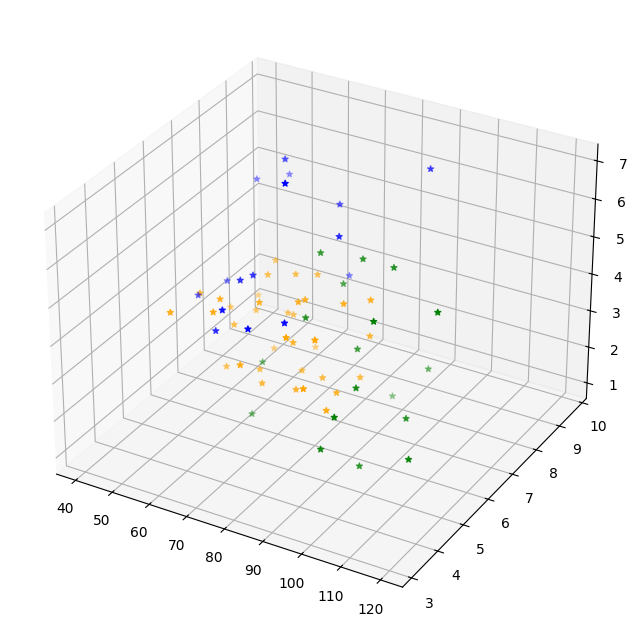

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

for label,colour in zip(g['Расса_e'].unique(),['green','orange','blue']):
    df = g[g['Расса_e']== label]
    ax.scatter(df['Вес'],df['Скорость'],df['Интеллект'],c=colour,label=label,marker='*')
plt.show()


In [53]:
from sklearn import svm
c = svm.SVC(kernel="linear",C=1)
c.fit(x_tr,y_tr)
y_pre = c.predict(x_ts)
accc = accuracy_score(y_ts,y_pre)
print(accc)

0.7142857142857143
